<a href="https://colab.research.google.com/github/iceaiai/CS-team/blob/main/tutorial/2nd_tutorial_09_19_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Types of noises in EM: statistical noise (shot noise)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, Math
from scipy.ndimage import convolve
import requests
from PIL import Image
from io import BytesIO
from ipywidgets import interact, IntSlider, Button, VBox
from numpy.fft import ifftshift

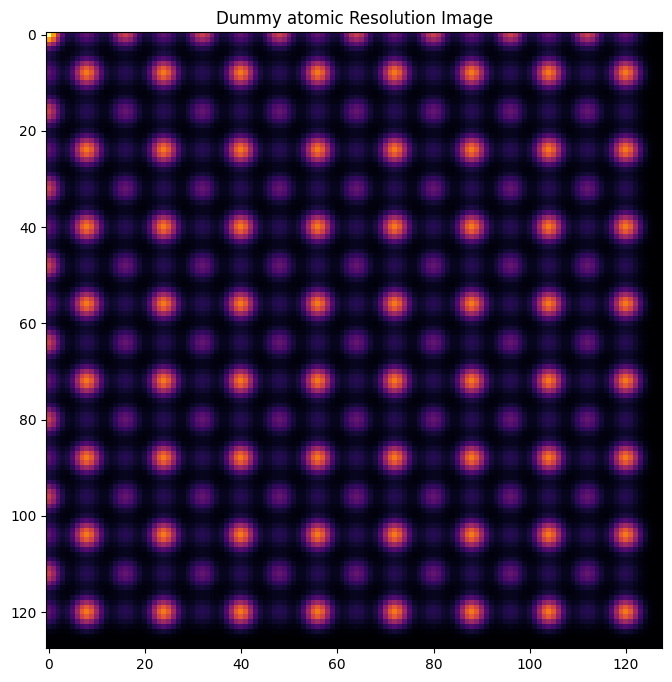

In [14]:
# First create a dummy atomic resolutio STEM image
from scipy.ndimage import gaussian_filter
# Parameters
image_size = 128  #
n = 16  # Separation between atoms in pixels
#m = 10  # Diameter of atoms in pixels
sigma = 2
intensity = 1
#image[[(i, j) for i in range(8, image_size, n) for j in range(8, image_size, n)]] = height
image = np.zeros((image_size, image_size))
np.random.seed(1234565)  # For reproducibility
# Plot the dummy atomic STEM image
def draw_atoms(image, n, height):
    for i in range(int(n/2), image_size, int(n)):  # Start at half of n for symmetry
        for j in range(int(n/2), image_size, int(n)):
          # A atom positions
          image[i, j] = height
          # B atom positions
          image[int((i+n//2)%image_size),int((j+n//2)%image_size)] = height*0.4
          # C atom positions
          image[int((i+n//2)%image_size),j] = height*0.2
          image[i,int((j+n//2)%image_size)] = height*0.2
draw_atoms(image,n,intensity)

# Apply Gaussian filter for atomic decay with tunable sigma
blurred_image = gaussian_filter(image, sigma=sigma)

# Plot the result
plt.figure(figsize=(8, 8))
plt.imshow(blurred_image, cmap='inferno', interpolation='nearest')
plt.title(f'Dummy atomic Resolution Image')
#plt.savefig('dummy_image.png')
plt.show()

<ipython-input-15-420707687d5a>:4: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return (lam**k) * np.exp(-lam) / np.math.factorial(k)


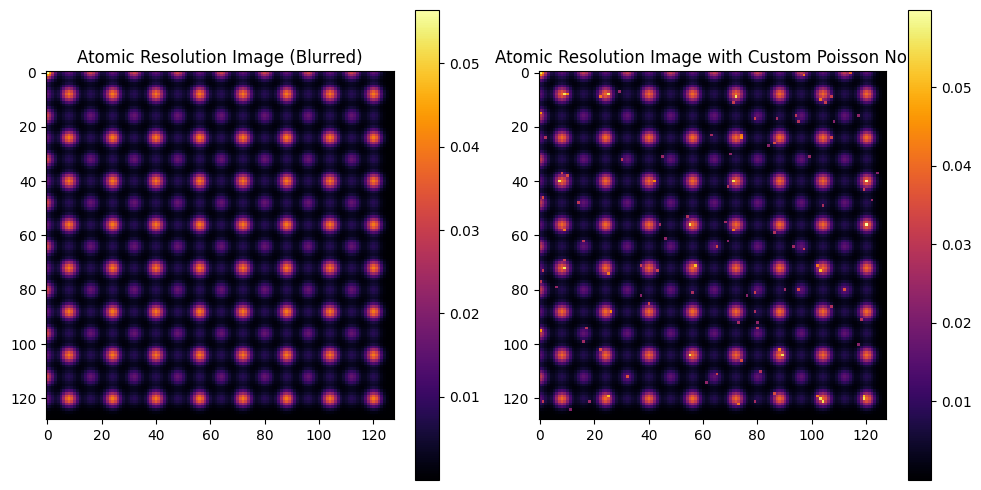

In [15]:
#Define poisson function
# P = lam^k * exp(-lam)/k!
def poisson(lam, k):
    return (lam**k) * np.exp(-lam) / np.math.factorial(k)
def apply_custom_poisson_noise(image, max_k=1000,threshold =0.02):
    noisy_image = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            lam = image[i, j]  # lambda is the pixel intensity
            # Create a cumulative distribution for k from 0 to max_k
            cumulative_prob = 0
            k = 0
            r = np.random.rand()  # Random number to sample from Poisson distribution
            while k < max_k:  # We iterate to choose a k based on the cumulative probability
                cumulative_prob += poisson(lam, k)
                if r < cumulative_prob:
                    break
                k += 1
            noisy_image[i, j] = k*threshold + image[i, j]
    return noisy_image
# Apply the Poisson noise to the blurred image
noisy_image_custom = apply_custom_poisson_noise(blurred_image)

# Plot the original blurred image and the image with custom Poisson noise
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(blurred_image, cmap='inferno', interpolation='nearest')
plt.title('Atomic Resolution Image (Blurred)')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(noisy_image_custom, cmap='inferno', interpolation='nearest')
plt.title('Atomic Resolution Image with Custom Poisson Noise')
plt.colorbar()

plt.tight_layout()
plt.show()



In [16]:
def plot_images(threshold):
    noisy_image_custom = apply_custom_poisson_noise(blurred_image, threshold=threshold)
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(blurred_image, cmap='gray', interpolation='nearest')
    plt.title('Atomic Resolution Image (Blurred)')
    plt.colorbar()

    plt.subplot(1, 2, 2)
    plt.imshow(noisy_image_custom, cmap='gray', interpolation='nearest')
    plt.title('Atomic Resolution Image with Custom Poisson Noise')
    plt.colorbar()

    plt.tight_layout()
    plt.show()

# Use interact to create an interactive slider for the threshold
widgets.interact(plot_images, threshold=widgets.FloatSlider(min=0.0, max=0.4, step=0.01, value=0.02))

interactive(children=(FloatSlider(value=0.02, description='threshold', max=0.4, step=0.01), Output()), _dom_cl…

<function __main__.plot_images(threshold)>

#Types of noises in EM: Dark noise(thermo noise)
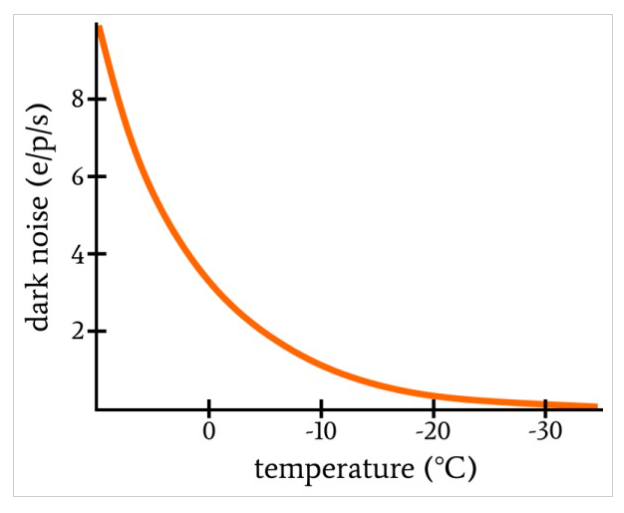

In [17]:
def add_dark_current_noise(image, temperature):
    # Dark noise decreases exponentially as temperature decreases
    std = 0.00173545 * np.exp(temperature/1.8767)
    dark_current_noise = np.random.normal(0, std, image.shape)
    return image + dark_current_noise

def interactive_display(threshold, temperature):
    # Apply Poisson noise
    noisy_image = apply_custom_poisson_noise(blurred_image, threshold=threshold)
    # Add dark current noise based on temperature
    noisy_image_with_dark = add_dark_current_noise(blurred_image, temperature)

    # Plotting results
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(blurred_image, cmap='inferno', interpolation='nearest')
    plt.title('Blurred Image')
    plt.colorbar()

    plt.subplot(1, 3, 2)
    plt.imshow(noisy_image, cmap='inferno', interpolation='nearest')
    plt.title('Poisson Noisy Image (Threshold: {:.02f})'.format(threshold))
    plt.colorbar()

    plt.subplot(1, 3, 3)
    plt.imshow(noisy_image_with_dark, cmap='inferno', interpolation='nearest')
    plt.title('Dark Noise st Temp: {:.01f}°C)'.format(temperature))
    plt.colorbar()

    plt.show()

# Create an interactive widgetss for threshold and temperature adjustment
widgets.interact(interactive_display,
         threshold=widgets.FloatSlider(value=0.02, min=0, max=0.1, step=0.01, description='Threshold:'),
         temperature=widgets.FloatSlider(value=0, min=-30, max=20, step=1, description='Temperature (°C):'))


interactive(children=(FloatSlider(value=0.02, description='Threshold:', max=0.1, step=0.01), FloatSlider(value…

<function __main__.interactive_display(threshold, temperature)>

# Fourier transformation

## d-spacings and frequencies

In [37]:
# Load the image from my github repository

from skimage import data, io, img_as_float
from skimage.draw import line
from ipywidgets import interact, FloatSlider, VBox, Output
url = 'https://github.com/iceaiai/CS-team/blob/1abeea52be1596b4f252b437935f694de36d567a/2D%20materials/2-10M-LAADF-AFTER%20DRIFTING%20CORRECTION-Average%20Image.png?raw=true'

response = requests.get(url)
image = Image.open(BytesIO(response.content))
image_np = np.array(image)
out = Output()

# Function to update line and plot histogram based on the interactive inputs
def update_plot(start_x, start_y, end_x, end_y, width):
    with out:
        # Clear previous plots
        out.clear_output(wait=True)
        fig, ax = plt.subplots(1, 2, figsize=(10, 5))

        # Plot the image
        ax[0].imshow(image_np, cmap='gray')
        ax[0].set_title('Interactive Line Scan')
        # Extract intensity values along the line
        rr, cc = line(int(start_y), int(start_x), int(end_y), int(end_x))
        rr = np.clip(rr, 0, image_np.shape[0] - 1)
        cc = np.clip(cc, 0, image_np.shape[1] - 1)
        # Draw the interactive line
        ax[0].plot([start_x, end_x], [start_y, end_y], 'r-', lw=width)
        intensities = []
        half_width = int(width // 2)  # Half-width for neighborhood around the line
        for r, c in zip(rr, cc):
            r_min = max(0, r - half_width)
            r_max = min(image_np.shape[0], r + half_width + 1)
            c_min = max(0, c - half_width)
            c_max = min(image_np.shape[1], c + half_width + 1)
            neighborhood_intensity = np.sum(image_np[r_min:r_max, c_min:c_max])
            intensities.append(neighborhood_intensity)

        # Plot the histogram of the line scan intensities
        ax[1].set_title('D-spacing')
        ax[1].hist(intensities, bins=30, color='blue')

        # Show the updated plot
        plt.show()

# Set up the interactive sliders for line position and width
start_x_slider = FloatSlider(min=0, max=image_np.shape[1], value=50, description='Start X')
start_y_slider = FloatSlider(min=0, max=image_np.shape[0], value=100, description='Start Y')
end_x_slider = FloatSlider(min=0, max=image_np.shape[1], value=400, description='End X')
end_y_slider = FloatSlider(min=0, max=image_np.shape[0], value=400, description='End Y')
width_slider = FloatSlider(min=0.1, max=10, step=0.1, value=1, description='Line Width')

# Use the `interact` function to tie sliders to the update_plot function
interactive_plot = interact(update_plot,
              start_x=start_x_slider,
              start_y=start_y_slider,
              end_x=end_x_slider,
              end_y=end_y_slider,
              width=width_slider)

# Display the Output widget to show the interactive plot
display(out)

interactive(children=(FloatSlider(value=50.0, description='Start X', max=1940.0), FloatSlider(value=100.0, des…

Output()

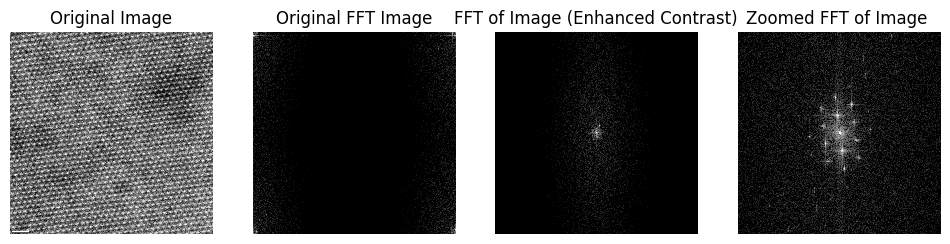

In [46]:
# Perform FFT
fft_image = np.fft.fft2(image_np)
fft_image_shifted = np.fft.fftshift(fft_image)  # Shift zero frequency to center
fft_magnitude = np.abs(fft_image_shifted)       # Magnitude of the FFT

log_image = np.log(fft_magnitude + 1)
# Adjust contrast: stretch the FFT magnitude to improve visibility
vmin = 0.56 * np.max(log_image)  # Scale to emphasize lower values
vmax = 0.8 * np.max(log_image)        # Keep max value
# Plot the original image and its FFT (with contrast adjustment)
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 4, 1)
plt.imshow(image_np, cmap='gray', interpolation='none')
plt.title("Original Image")
plt.axis('off')
# Original FFT image
plt.subplot(1, 4, 2)
plt.imshow(np.log(np.abs(fft_image)+1), cmap='gray', vmin=vmin, vmax=vmax,  interpolation='none')
plt.title("Original FFT Image")
plt.axis('off')

# FFT Maggnitude (Enhanced contrast)
plt.subplot(1, 4, 3)
plt.imshow(log_image, cmap='gray', vmin=vmin, vmax=vmax, interpolation='none')  # Enhanced contrast
plt.title("FFT of Image (Enhanced Contrast)")
plt.axis('off')

dim_x,dim_y = log_image.shape
plt.subplot(1, 4, 4)
plt.imshow(log_image[int(dim_x/8*3):int(dim_x/8*5),int(dim_y/8*3):int(dim_y/8*5)], cmap='gray', vmin=vmin, vmax=vmax, interpolation='none')  # Enhanced contrast
plt.title("Zoomed FFT of Image ")
plt.axis('off')

plt.show()

In [20]:

dim_x, dim_y = fft_magnitude.shape
crop_x_start, crop_x_end = int(dim_x / 8 * 3), int(dim_x / 8 * 5)
crop_y_start, crop_y_end = int(dim_y / 8 * 3), int(dim_y / 8 * 5)
def apply_circle_mask(radius):
    # Create a circular mask
    rows, cols = image_np.shape
    center_row, center_col = rows // 2, cols // 2
    y, x = np.ogrid[:rows, :cols]
    mask = (x - center_col)**2 + (y - center_row)**2 <= radius**2

    # Apply the mask to the entire shifted FFT
    masked_fft = fft_image_shifted * mask

    # Inverse FFT on the masked FFT
    masked_fft_unshifted = ifftshift(masked_fft)  # Shift the frequencies back
    inverse_image = np.fft.ifft2(masked_fft_unshifted).real  # Perform inverse FFT

    # Plot the cropped FFT and the reconstructed image
    plt.figure(figsize=(12, 6))

    # Cropped FFT with circular mask
    plt.subplot(1, 3, 1)
    cropped_fft = np.log(np.abs(masked_fft) + 1)[crop_x_start:crop_x_end, crop_y_start:crop_y_end]  # Crop FFT for display
    plt.imshow(cropped_fft, cmap='gray', interpolation='none')
    plt.title(f"Cropped FFT (Radius = {radius})")
    plt.axis('off')

    # Reconstructed image from inverse FFT
    plt.subplot(1, 3, 2)
    plt.imshow(inverse_image, cmap='gray', interpolation='none')
    plt.title("Reconstructed Image from Inverse FFT")
    plt.axis('off')
    plt.subplot(1, 3, 3)
    plt.imshow(image_np, cmap='gray', interpolation='none')
    plt.title("Original Image")
    plt.axis('off')
    plt.show()

# Create an interactive widget for radius adjustment
radius_slider = widgets.IntSlider(value=90, min=1, max=image_np.shape[0]//4, step=1, description='Radius')

# Display the widget and the plot
interactive_plot = widgets.interactive(apply_circle_mask, radius=radius_slider)
display(interactive_plot)

interactive(children=(IntSlider(value=90, description='Radius', max=485, min=1), Output()), _dom_classes=('wid…